<font color='red', size=1>This is a temporary copy of the original notebook found in `/home/mi/gph82/SOURCE_gph82/python/molPX/molpx/notebooks/Di-Ala.ipynb`. This temporary copy is located in `/tmp/tmps1xzenyf_test_molpx_notebook/Di-Ala.ipynb`. Feel free to play around, modify or even break this notebook. It wil be deleted on exit it and a new one created next time you issue `molpx.example_notebook()`</font>

# molPX Di-Ala example
<pre> 
Guillermo Perez-Hernandez  guille.perez@fu-berlin.de 
</pre>
   
In this notebook we will be using the xxx trajectory of Di-Ala-peptide to easily identify conformations

In [1]:
top = '/group/ag_cmb/scratch/deeptime_data/ala2.pdb'
MD_trajfiles = ['/group/ag_cmb/scratch/deeptime_data/ala2.dcd'
               ]

import molpx
from matplotlib import pylab as plt
%matplotlib notebook
import pyemma
import numpy as np

## Generate $\phi,\psi$ pairs

In [2]:
feat = pyemma.coordinates.featurizer(top)
feat.add_backbone_torsions()
src  = pyemma.coordinates.source(MD_trajfiles, features=feat)
Y = src.get_output()        

Widget Javascript not detected.  It may not be installed properly. Did you enable the widgetsnbextension? If not, then run "jupyter nbextension enable --py --sys-prefix widgetsnbextension"


## Visualize a FES and the molecular structures behind it
Execute the following cell and click either on the FES or on the slidebar

09-05-17 16:55:12 pyemma.coordinates.clustering.regspace.RegularSpaceClustering[1] WARNING  Maximum number of cluster centers reached. Consider increasing max_centers or choose a larger minimum distance, dmin.
09-05-17 16:55:12 pyemma.coordinates.clustering.regspace.RegularSpaceClustering[1] INFO     Presumably finished estimation. Message: Used data for centers: 4.00%


/home/mi/gph82/programs/PyEmma/pyemma/coordinates/clustering/regspace.py:151: UserWarning: Maximum number of cluster centers reached. Consider increasing max_centers or choose a larger minimum distance, dmin.
  warnings.warn(msg)
Widget Javascript not detected.  It may not be installed properly. Did you enable the widgetsnbextension? If not, then run "jupyter nbextension enable --py --sys-prefix widgetsnbextension"


<IPython.core.display.Javascript object>


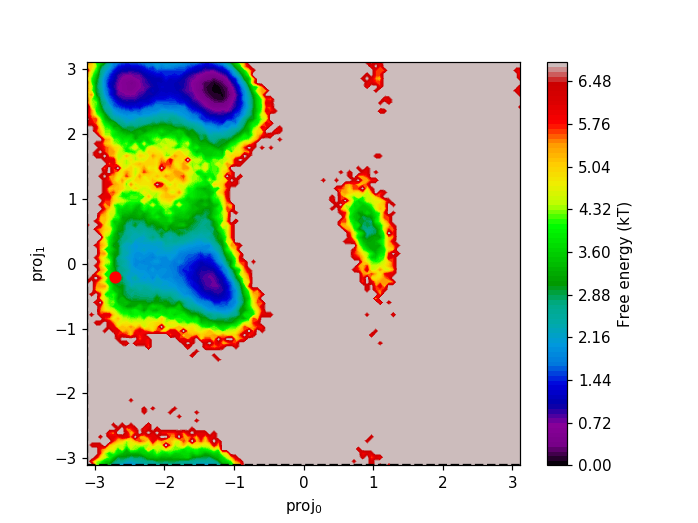

/home/mi/gph82/miniconda3/lib/python3.4/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The spectral and spectral_r colormap was deprecated in version 2.0. Use nipy_spectral and nipy_spectral_r instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
Widget Javascript not detected.  It may not be installed properly. Did you enable the widgetsnbextension? If not, then run "jupyter nbextension enable --py --sys-prefix widgetsnbextension"
Widget Javascript not detected.  It may not be installed properly. Did you enable the widgetsnbextension? If not, then run "jupyter nbextension enable --py --sys-prefix widgetsnbextension"


In [3]:
ax, fig, iwd, data_sample, geom = molpx.visualize.FES(MD_trajfiles, 
                                                      top,                                                       
                                                      Y,                                                       
                                                      #proj_idxs=[1],
                                          )
iwd.add_ball_and_stick()
iwd.center_view()
iwd.display(gui=True)

## Visualize trajectories, FES and molecular structures

<IPython.core.display.Javascript object>


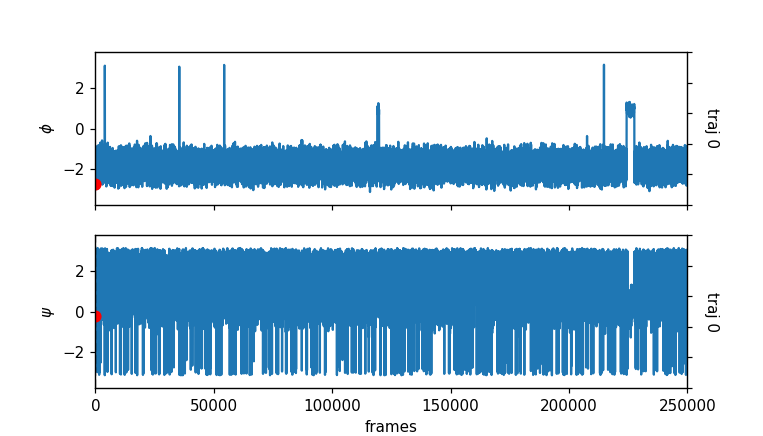

<IPython.core.display.Javascript object>


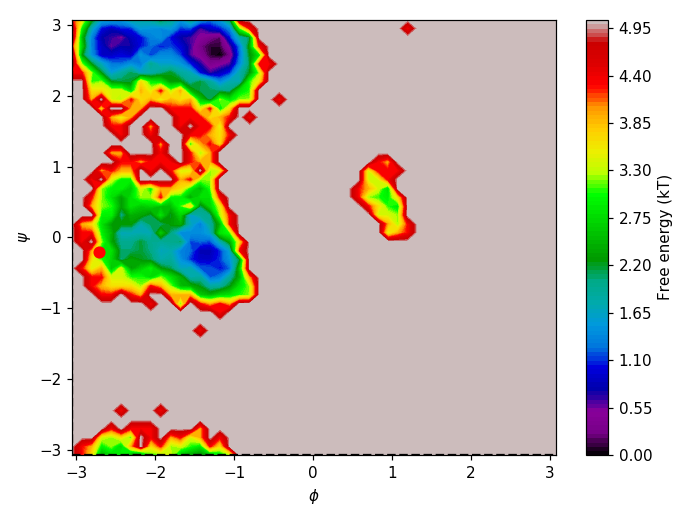

/home/mi/gph82/miniconda3/lib/python3.4/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The spectral and spectral_r colormap was deprecated in version 2.0. Use nipy_spectral and nipy_spectral_r instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
Widget Javascript not detected.  It may not be installed properly. Did you enable the widgetsnbextension? If not, then run "jupyter nbextension enable --py --sys-prefix widgetsnbextension"


In [4]:
__, myfig, iwd, __ = molpx.visualize.traj(MD_trajfiles,     
                                          top,                                                                                                                              
                                          Y,                                        
                                          plot_FES = True,                                        
                                          #dt = dt*1e-6, tunits='ms',                                           
                                          max_frames=10000,
                                          proj_idxs=[0, 1],
                                          panel_height=2,    
                                          proj_labels=['$\phi$', '$\psi$']
                          )
myfig.tight_layout()
iwd.add_ball_and_stick()
iwd.center_view()
iwd

# Intermediate steps: using molpx to generate a regspace sample of the data
See the documentation of `molpx.generate.sample` to find out about all possible options:
```
molpx.generate.sample(MD_trajectories, MD_top, projected_trajectories, proj_idxs=[0, 1], n_points=100, n_geom_samples=1, keep_all_samples=False, proj_stride=1, verbose=False, return_data=False)
```

In [5]:
data_sample, geoms = molpx.generate.sample(MD_trajfiles,                                            
                                           top, 
                                           Y,                                            
                                           n_points=200   ,
                                            n_geom_samples=5,
                                           keep_all_samples=True,
                                    )
data_sample.shape, geoms


09-05-17 16:55:20 pyemma.coordinates.clustering.regspace.RegularSpaceClustering[3] WARNING  Maximum number of cluster centers reached. Consider increasing max_centers or choose a larger minimum distance, dmin.
09-05-17 16:55:20 pyemma.coordinates.clustering.regspace.RegularSpaceClustering[3] INFO     Presumably finished estimation. Message: Used data for centers: 2.00%


/home/mi/gph82/programs/PyEmma/pyemma/coordinates/clustering/regspace.py:151: UserWarning: Maximum number of cluster centers reached. Consider increasing max_centers or choose a larger minimum distance, dmin.
  warnings.warn(msg)
Widget Javascript not detected.  It may not be installed properly. Did you enable the widgetsnbextension? If not, then run "jupyter nbextension enable --py --sys-prefix widgetsnbextension"


((196, 2),
 [<mdtraj.Trajectory with 196 frames, 22 atoms, 3 residues, and unitcells at 0x7fdd054bc6d8>,
  <mdtraj.Trajectory with 196 frames, 22 atoms, 3 residues, and unitcells at 0x7fdd0552beb8>,
  <mdtraj.Trajectory with 196 frames, 22 atoms, 3 residues, and unitcells at 0x7fdd054cd208>,
  <mdtraj.Trajectory with 196 frames, 22 atoms, 3 residues, and unitcells at 0x7fdd054d4128>,
  <mdtraj.Trajectory with 196 frames, 22 atoms, 3 residues, and unitcells at 0x7fdd054de668>])

## Link the PDF plot with the sampled structures and visually explore the FES 
Click either on the plot or on the widget slidebar: they're connected! 

<IPython.core.display.Javascript object>


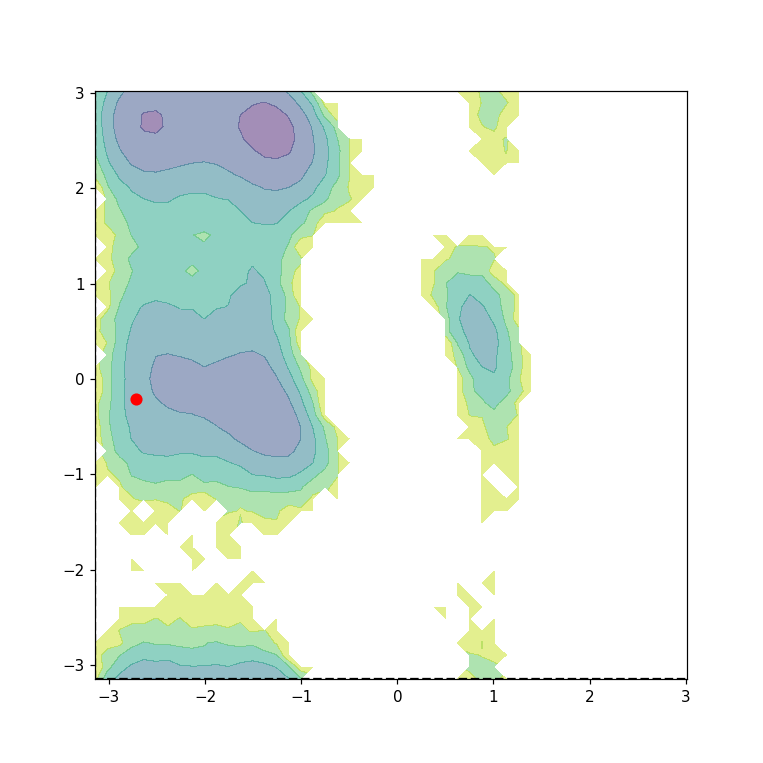

/home/mi/gph82/miniconda3/lib/python3.4/site-packages/ipykernel/__main__.py:4: RuntimeWarning: divide by zero encountered in log
Widget Javascript not detected.  It may not be installed properly. Did you enable the widgetsnbextension? If not, then run "jupyter nbextension enable --py --sys-prefix widgetsnbextension"


In [6]:
# Replot the FES
plt.figure(figsize=(7,7))
h, (x,y) = np.histogramdd(np.vstack(Y)[:,:2], bins=50)
plt.contourf(x[:-1], y[:-1], -np.log(h.T), alpha=.50)
# Create the linked widget
linked_wdg = molpx.visualize.sample(data_sample, 
                              geoms,                      
                              plt.gca(), 
                              clear_lines=True,
                              #plot_path=True, 
                              sticky=True,
                              # These are all kwargs of the ax2wid linking function
                              sticky_rep='ball+stick',
                              sticky_sel='not hydrogen',
                              #superpose=[1,4,5,6],
                            )
linked_wdg.center_view()
linked_wdg


# Paths samples along the different projections (=axis)

In [7]:
paths_dict, idata = molpx.generate.projection_paths(MD_trajfiles, 
                                                    top, 
                                                    Y, 
                                                    n_points=50,
                                                    proj_idxs=[0,1],
                                                    n_projs=3,
                                                    proj_dim = 3, 
                                                    verbose=False, 
                                        )

Widget Javascript not detected.  It may not be installed properly. Did you enable the widgetsnbextension? If not, then run "jupyter nbextension enable --py --sys-prefix widgetsnbextension"
Widget Javascript not detected.  It may not be installed properly. Did you enable the widgetsnbextension? If not, then run "jupyter nbextension enable --py --sys-prefix widgetsnbextension"


In [8]:
# Choose the coordinate and the tyep of path
coord = 1
path_type = 'min_rmsd'
#path_type = 'min_disp'
igeom = paths_dict[coord][path_type]["geom"]
ipath = paths_dict[coord][path_type]["proj"]

# Choose the proj_idxs for the path and the FES 
# to be shown
proj_idxs = [0,1]

<IPython.core.display.Javascript object>


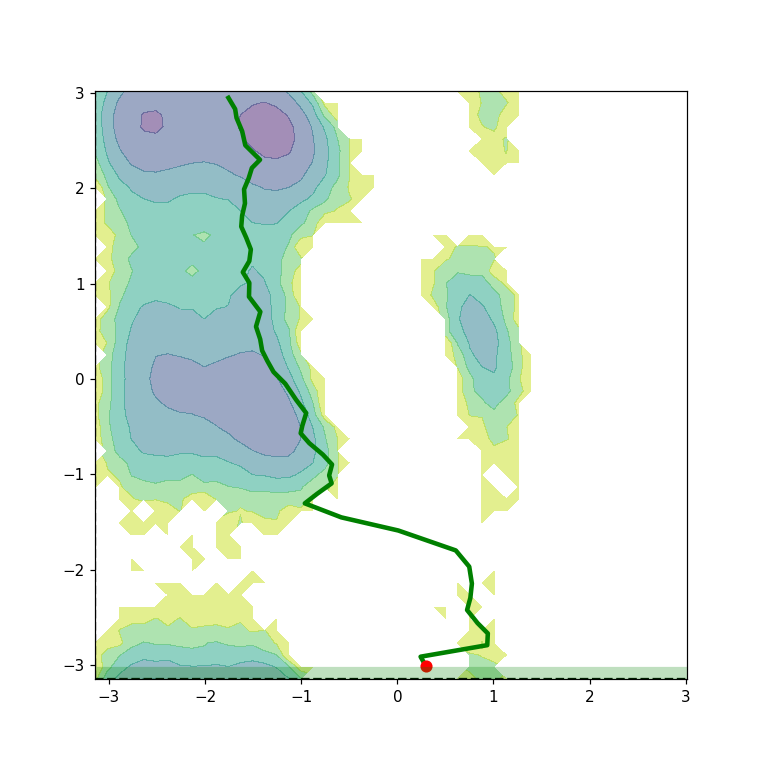

/home/mi/gph82/miniconda3/lib/python3.4/site-packages/ipykernel/__main__.py:3: RuntimeWarning: divide by zero encountered in log
  app.launch_new_instance()
Widget Javascript not detected.  It may not be installed properly. Did you enable the widgetsnbextension? If not, then run "jupyter nbextension enable --py --sys-prefix widgetsnbextension"


In [9]:
plt.figure(figsize=(7,7))
h, (x,y) = np.histogramdd(np.vstack(Y)[:,proj_idxs], bins=50)
plt.contourf(x[:-1], y[:-1], -np.log(h.T), alpha=.50)

linked_wdg = molpx.visualize.sample(ipath[:,proj_idxs], 
                                    igeom,                             
                                    plt.gca(), 
                                    clear_lines=True,
                                    n_smooth = 1, 
                                    plot_path=True,                        
                                    #superpose=[1,4,5,6]
                                    #radius=True,
                            )
linked_wdg.add_ball_and_stick(selection='not hydrogen')
linked_wdg.center_view()
linked_wdg

# Let's do TICA and try to look a the correlations in a TICA analysis

In [10]:
feat = pyemma.coordinates.featurizer(top)
#feat.add_backbone_torsions(cossin=True)
feat.add_distances(feat.topology.select('symbol != H'))
src  = pyemma.coordinates.source(MD_trajfiles, features=feat)
tica = pyemma.coordinates.tica(src, lag=1)
Y = tica.get_output()    

09-05-17 16:56:35 pyemma.coordinates.data.featurization.featurizer.MDFeaturizer[7] WARNING  The 1D arrays input for add_distances() have been sorted, and index duplicates have been eliminated.
Check the output of describe() to see the actual order of the features


Widget Javascript not detected.  It may not be installed properly. Did you enable the widgetsnbextension? If not, then run "jupyter nbextension enable --py --sys-prefix widgetsnbextension"
Widget Javascript not detected.  It may not be installed properly. Did you enable the widgetsnbextension? If not, then run "jupyter nbextension enable --py --sys-prefix widgetsnbextension"


<IPython.core.display.Javascript object>


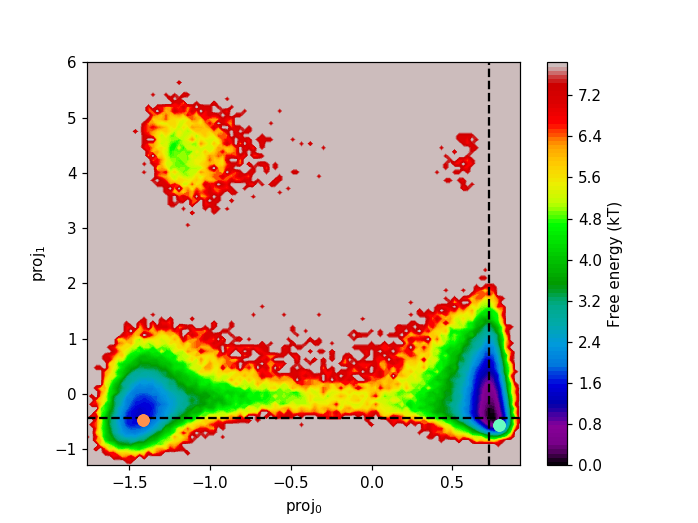

/home/mi/gph82/miniconda3/lib/python3.4/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The spectral and spectral_r colormap was deprecated in version 2.0. Use nipy_spectral and nipy_spectral_r instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [16]:

ax, fig, iwd, data_sample, geom = molpx.visualize.FES(MD_trajfiles, 
                                                      top,                                                       
                                                      Y,                                                       
                                                      n_overlays=5,
                                                      sticky=True,
                                                      sticky_rep='ball+stick', 
                                                      sticky_sel='not hydrogen',                                                      
                                          )
iwd.center_view()
iwd.display(gui=True)

<IPython.core.display.Javascript object>


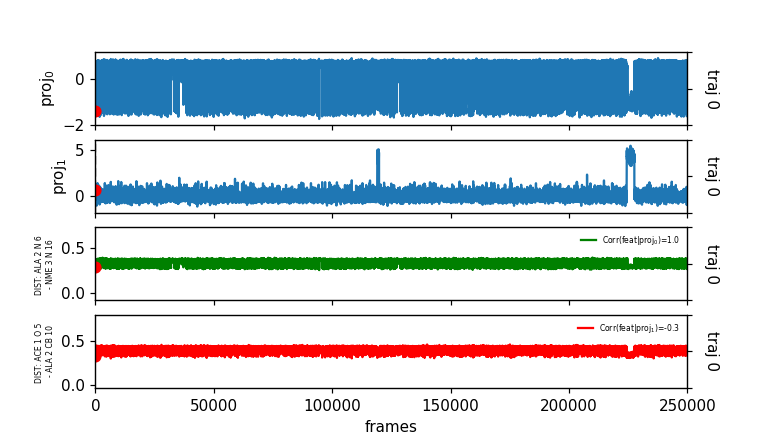

<IPython.core.display.Javascript object>


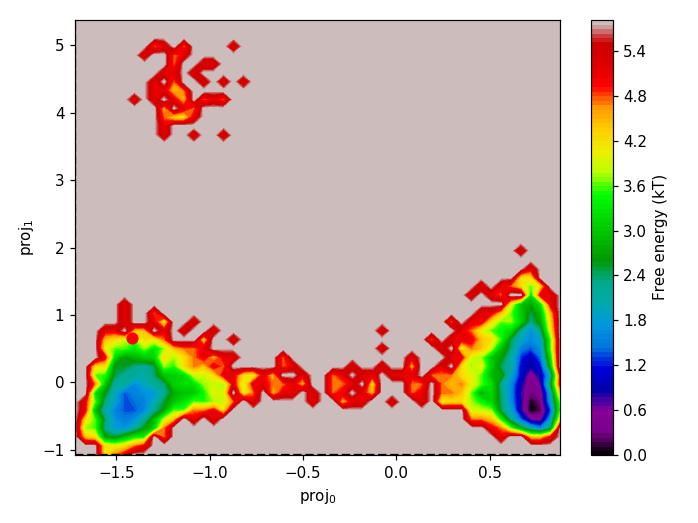

/home/mi/gph82/miniconda3/lib/python3.4/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The spectral and spectral_r colormap was deprecated in version 2.0. Use nipy_spectral and nipy_spectral_r instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [11]:
__, myfig, iwd, __ = molpx.visualize.traj(MD_trajfiles,     
                                          top,                                                                                                                              
                                          Y,                                        
                                          plot_FES = True,                                        
                                          #dt = dt*1e-6, tunits='ms',                                           
                                          max_frames=10000,
                                          #proj_idxs=[0,1],
                                          panel_height=2,                                              
                                          projection=tica
                          )
myfig.tight_layout()
iwd.add_ball_and_stick()
iwd.center_view()
iwd

In [17]:
paths_dict, idata = molpx.generate.projection_paths(MD_trajfiles, 
                                                    top, 
                                                    Y, 
                                                    n_points=50,
                                                    proj_idxs=[0,1],
                                                    n_projs=2,
                                                    proj_dim = 2, 
                                                    verbose=False, 
                                        )

In [18]:
# Choose the coordinate and the tyep of path
coord = 0
path_type = 'min_rmsd'
#path_type = 'min_disp'
igeom = paths_dict[coord][path_type]["geom"]
ipath = paths_dict[coord][path_type]["proj"]

# Choose the proj_idxs for the path and the FES 
# to be shown
proj_idxs = [0,1]

<IPython.core.display.Javascript object>


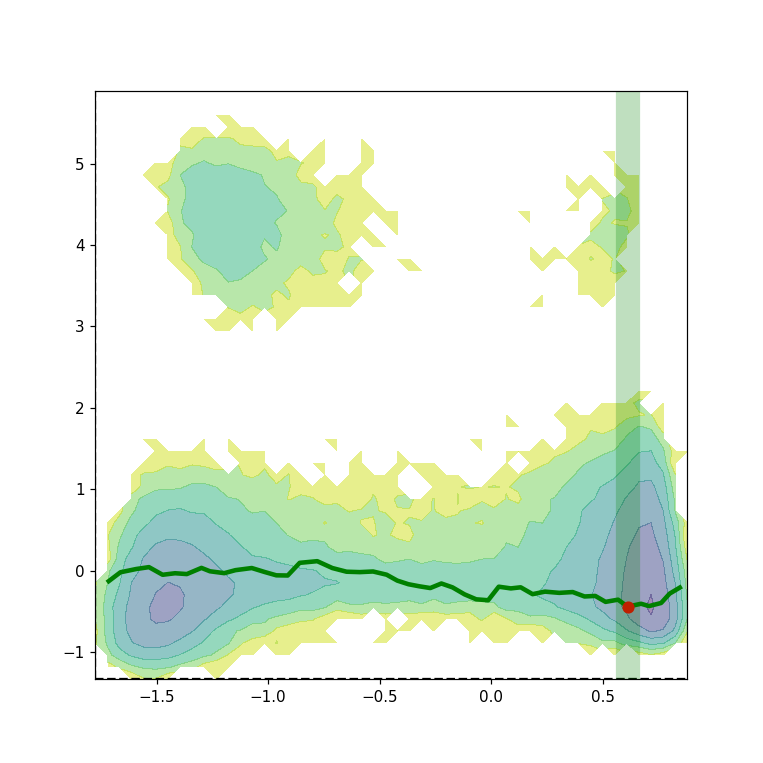

/home/mi/gph82/miniconda3/lib/python3.4/site-packages/ipykernel/__main__.py:3: RuntimeWarning: divide by zero encountered in log
  app.launch_new_instance()


caught index error with index 48 (new=48, old=47)
caught index error with index 48 (new=48, old=47)
caught index error with index 48 (new=48, old=47)


In [19]:
plt.figure(figsize=(7,7))
h, (x,y) = np.histogramdd(np.vstack(Y)[:,proj_idxs], bins=50)
plt.contourf(x[:-1], y[:-1], -np.log(h.T), alpha=.50)

linked_wdg = molpx.visualize.sample(ipath[:,proj_idxs], 
                                    igeom,                             
                                    plt.gca(), 
                                    clear_lines=True,
                                    n_smooth = 1, 
                                    plot_path=True,                        
                            )
linked_wdg.add_ball_and_stick(selection='not hydrogen')
linked_wdg.center_view()
linked_wdg